<a href="https://colab.research.google.com/github/Vibha-K-Dattathri/Image-Classification/blob/main/ImageClassificationUsingTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification

### Checking and Setting up the environment

In [ ]:
!nvidia-smi # To check GPU instance

Thu Apr 24 05:41:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf # Importing tensorflow - a pretrained model

In [ ]:
tf.__version__ # Checking tensorflow version

'2.18.0'

In [ ]:
import keras # Keras is integrated to tensorflow

In [ ]:
keras.__version__ # Checking keras version

'3.8.0'

### Preparing the Dataset

#### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd # Current directory

'/content'

In [ ]:
%cd /content/drive/MyDrive/DEEP_LEARNING_PROJECT

/content/drive/MyDrive/DEEP_LEARNING_PROJECT


In [ ]:
%pwd

'/content/drive/MyDrive/DEEP_LEARNING_PROJECT'

In [ ]:
%ls # Listing

ImageClassificationUsingTensorflow.ipynb  train/  validation/


### Importing libraries

In [ ]:
# Importing essential layers to build the model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

# To define and compile a complete model architecture
from tensorflow.keras.models import Model

# Importing pre-trained VGG16 model for transfer learning
from tensorflow.keras.applications.vgg16 import VGG16

# To load and work with individual images
from tensorflow.keras.preprocessing import image

# For image data augmentation and loading images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Sequential model is a simpler way to stack layers linearly
from tensorflow.keras.models import Sequential

# For numerical operations like converting images to arrays
import numpy as np

# To get a list of image file paths using wildcards
from glob import glob

### Training the model

In [ ]:
%ls

ImageClassificationUsingTensorflow.ipynb  train/  validation/


In [ ]:
# Set constants
IMAGE_SIZE = [224, 224] # Setting image size

train_path = 'train' # Training dataset path
valid_path = 'validation' # Testing dataset path

In [ ]:
IMAGE_SIZE + [3]

[224, 224, 3]

In [ ]:
# Download vgg16 pretrained model
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# To veiw all 16 layers
for layer in vgg16.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
# To freeze all 16 layers
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# To check if it is freezed
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# Summary of the model
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
folder = glob("train/*")

In [ ]:
folder

['train/Dog', 'train/Cat']

In [ ]:
len(folder)

2

#### Adding our costom dense layers

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(folder), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Data transformation
train_datagen = ImageDataGenerator(
    rescale=1./255, #Minmax scale
    shear_range=0.2, # Rotate image
    zoom_range=0.2, # Zoom image
    horizontal_flip=True # Flip operations
    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
%ls

ImageClassificationUsingTensorflow.ipynb  train/  validation/


In [ ]:
# Loading train images
training_set = train_datagen.flow_from_directory(
    "train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
    )

Found 2001 images belonging to 2 classes.


In [ ]:
# Loading test images
test_set = test_datagen.flow_from_directory(
    "validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
    )

Found 800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback: monitors val_loss, waits 3 epochs before stopping early
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with 15 epochs and EarlyStopping
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=15,  # You can increase or decrease this
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stop]  # Add the callback here
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.9254 - loss: 0.1747 - val_accuracy: 0.8263 - val_loss: 0.4012
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 555ms/step - accuracy: 0.9126 - loss: 0.1959 - val_accuracy: 0.9225 - val_loss: 0.2006
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 560ms/step - accuracy: 0.9387 - loss: 0.1669 - val_accuracy: 0.9300 - val_loss: 0.2100
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.9289 - loss: 0.1728 - val_accuracy: 0.8913 - val_loss: 0.2747
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 569ms/step - accuracy: 0.9253 - loss: 0.1635 - val_accuracy: 0.8213 - val_loss: 0.5353


### Analysing the model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.9155422449111938,
  0.9220389723777771,
  0.9395302534103394,
  0.929035484790802,
  0.933533251285553],
 'loss': [0.19661399722099304,
  0.18982471525669098,
  0.16059289872646332,
  0.1628114879131317,
  0.16158993542194366],
 'val_accuracy': [0.8262500166893005,
  0.9225000143051147,
  0.9300000071525574,
  0.8912500143051147,
  0.8212500214576721],
 'val_loss': [0.4012273848056793,
  0.2005869299173355,
  0.2099612057209015,
  0.2747119963169098,
  0.5352700352668762]}

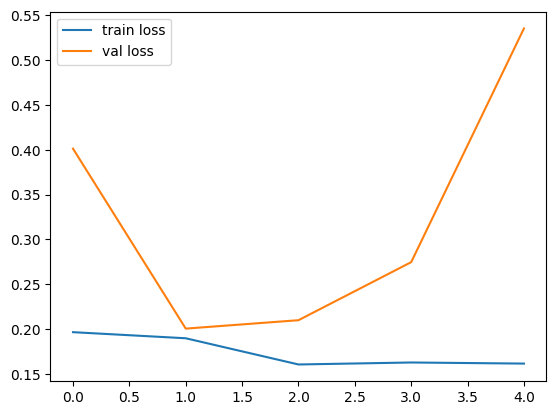

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig("Loss graph")

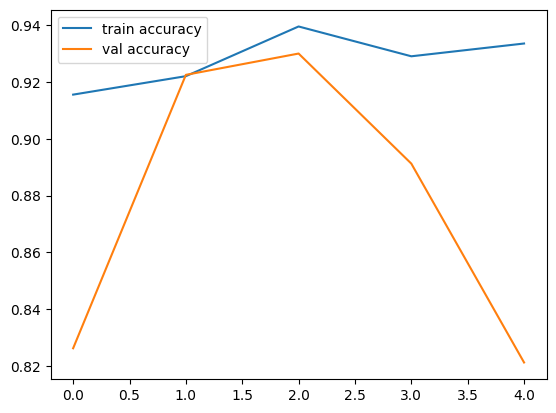

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy graph")

### Saving and loading the model

In [ ]:
# Save Model
model.save("model_vgg16.keras")

In [ ]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("model_vgg16.keras")

In [ ]:
y_pred = model.predict(test_set)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step


In [ ]:
y_pred

array([[9.9054354e-01, 9.4565339e-03],
       [7.9432073e-05, 9.9992061e-01],
       [9.6084005e-01, 3.9159998e-02],
       ...,
       [9.9295676e-01, 7.0432764e-03],
       [9.5353949e-01, 4.6460576e-02],
       [9.9418628e-01, 5.8137388e-03]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
%ls

 10002.jpg             ImageClassificationUsingTensorflow.ipynb
 10039.jpg            'Loss graph.png'
 303.jpg               model_vgg16.keras
'Accuracy graph.png'   train/
 cat_img.jpg           validation/
 dog_img.jpg


In [ ]:
# Load test image
image_name = "303.jpg"

In [ ]:
img = image.load_img(image_name, target_size=(224, 224))

In [ ]:
# Pexel number of the image
x = image.img_to_array(img)
x

array([[[ 50.,  34.,  37.],
        [ 52.,  40.,  44.],
        [ 37.,  28.,  33.],
        ...,
        [ 36.,  14.,  17.],
        [ 38.,  24.,  23.],
        [ 31.,  22.,  17.]],

       [[ 31.,  19.,  19.],
        [ 32.,  23.,  24.],
        [ 25.,  21.,  22.],
        ...,
        [ 40.,  20.,  22.],
        [ 43.,  32.,  30.],
        [ 50.,  41.,  36.]],

       [[ 43.,  35.,  33.],
        [ 34.,  28.,  28.],
        [ 17.,  15.,  16.],
        ...,
        [ 39.,  19.,  21.],
        [ 42.,  31.,  29.],
        [ 57.,  48.,  43.]],

       ...,

       [[119., 120., 112.],
        [106., 106.,  98.],
        [125., 121., 112.],
        ...,
        [155.,  43.,  55.],
        [158.,  46.,  58.],
        [157.,  45.,  57.]],

       [[118., 113., 109.],
        [108., 103.,  97.],
        [129., 125., 116.],
        ...,
        [154.,  42.,  54.],
        [152.,  40.,  52.],
        [152.,  40.,  52.]],

       [[144., 138., 124.],
        [129., 128., 110.],
        [149., 1

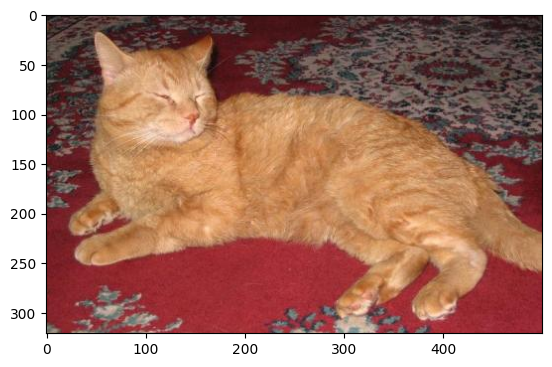

In [ ]:
# To show image
Z = plt.imread(image_name)
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/225 # Minmax scaling

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Adding bas dimention
import numpy as np
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.9966633 , 0.00333673]], dtype=float32)

In [ ]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
result

array([0])

In [ ]:
if result[0] == 1:
  prediction = 'dog'
  print(prediction)
else:
  prediction = 'cat'
  print(prediction)

cat


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_set.classes  # true labels
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[202 198]
 [214 186]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       400
           1       0.48      0.47      0.47       400

    accuracy                           0.48       800
   macro avg       0.48      0.48      0.48       800
weighted avg       0.48      0.48      0.48       800

